## Problem statement

Calculate a visible distance of an inferior mirage. Assume that the refractive index at height $h$ is proportional to air concentration $N(h)$: $$n(h) - 1 \propto N(h),$$
the air temperature decreases linearly from $50^\circ C$ at the ground level to $20^\circ C$ at the height of 2 m. The viewpoint is located at the height of 1.7 m. At $20^\circ C$, the air refractive index is different from unity by $\Delta n = 4\cdot 10^{-4}$.

Below, we set the physical parameters of the problem. The speed of light does not affect the solution to the problem, so we assume $c = 1$ to avoid rounding errors.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import solve_ivp
T0 = 273+50 # K
T_h0 = 273+20 # K
h0 = 2 # m
H = 1.7 # m
deltan = 4e-4
c = 1 # m/s
theta0 = np.pi/2 - 0.005

The refractive index is given by $$n(y) = 1+\Delta n \frac{T(h_0)}{T(0)}.$$
The temperature field is given by $$T(y) = T(0) - y \frac{T(0) - T(h_0)}{h_0}.$$

Assume now that a light ray travels from the point $x = 0, y = 1.7$ down at a normal angle of $\theta_0$. Before the total internal reflection occurs, the normal angle of the light at each timepoint is given by $$\theta(t) = \operatorname{arcsin}\left(\frac{n(h_0)\sin\theta_0}{n(y(t))}\right).$$
The propagation of the light ray is then governed by $$\frac{\mathrm{d}y}{\mathrm{d}t} = c\cos\theta(t), $$ $$\frac{\mathrm{d}x}{\mathrm{d}t} = c\sin\theta(t).$$
The problem is reduced to solving the initial value problem for this system of ordinary differential equations with the initial values of $y(0) = H, x(0) = 0$. At some point, the ray either hits the ground or experiences a total internal reflection. In the first case, the ray will not show an inferior mirage; in the second case, the ray will be the part of the inferior mirage.


Setting up some code to explore the range of solutions to the initial value problem.

<ipython-input-74-71d2f57e65a2>:11: RuntimeWarning: invalid value encountered in arcsin
  theta_new = np.arcsin(n(h0) * np.sin(theta0) / n(y))


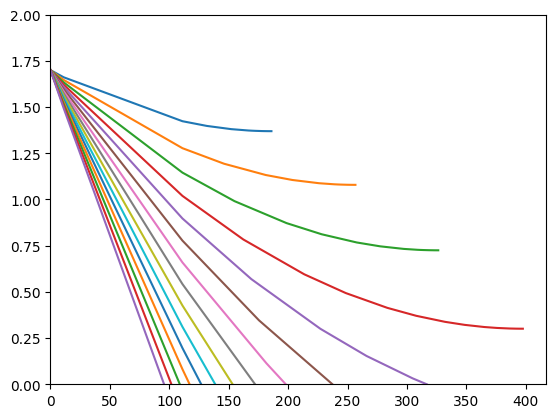

In [74]:
plt.figure()
for theta0 in np.pi/2 - np.arange(0.005, 0.02, 0.001):
  def T(y):
    return (T0 - y * (T0 - T_h0) / h0)

  def n(y):
    return (1 + deltan * T_h0 / T(y))

  def func(t, r):
    x, y = r[0], r[1]
    theta_new = np.arcsin(n(h0) * np.sin(theta0) / n(y))
    return([c * np.sin(theta_new), -c * np.cos(theta_new), ])

  def earth_crossing(t, r):
    return r[1]

  def total_reflection(t, r):
    x, y = r[0], r[1]
    return n(h0) * np.sin(theta0) / n(y) - 1

  earth_crossing.terminal = True
  total_reflection.terminal = True

  sol = solve_ivp(func, [0, 3000], [0, H], events = [earth_crossing, total_reflection])
  plt.plot(sol.y[0], sol.y[1])
plt.xlim(left=0)
plt.ylim([0, 2])
plt.show()

We observed that for some of the initial angles, the rays hit the ground, and for some angles closer to the limit value of $\pi/2$, the rays undergo a total internal reflection and reflect into the sky. We can estimate the boundary value of the initial angle more precisely. At the straight line passing through the viewpoint at this initial angle, the mirage will be visible to the observer.

<ipython-input-76-f37c4ea89439>:11: RuntimeWarning: invalid value encountered in arcsin
  theta_new = np.arcsin(n(h0) * np.sin(theta0) / n(y))


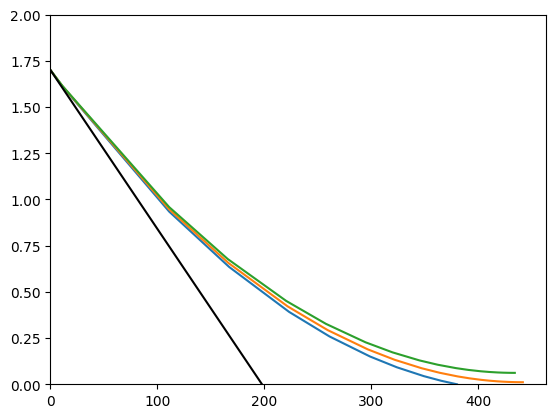

In [76]:
plt.figure()
for theta0 in [1.5621, 1.5622, 1.5623]:
  def T(y):
    return (T0 - y * (T0 - T_h0) / h0)

  def n(y):
    return (1 + deltan * T_h0 / T(y))

  def func(t, r):
    x, y = r[0], r[1]
    theta_new = np.arcsin(n(h0) * np.sin(theta0) / n(y))
    return([c * np.sin(theta_new), -c * np.cos(theta_new), ])

  def earth_crossing(t, r):
    return r[1]

  def total_reflection(t, r):
    x, y = r[0], r[1]
    return n(h0) * np.sin(theta0) / n(y) - 1

  earth_crossing.terminal = True
  total_reflection.terminal = True

  sol = solve_ivp(func, [0, 3000], [0, H], events = [earth_crossing, total_reflection])
  plt.plot(sol.y[0], sol.y[1])
  plt.ylim([0, 2])
plt.plot([0, H * np.tan(1.5622)], [H, 0], "k")
plt.xlim(left=0)
plt.show()

The blue line in the plot above (at $\theta_0 = 1.5621$) shows a ray that hits the ground (the observer will see the ground), while the rays at $\theta_0 = 1.5622$ and $\theta_0 = 1.5623$ reach towards the sky.

The observer sees the mirage at an apparent distance of 200 m, while the mirage shows the image of the distant sky objects or some objects more than 400 m away from the observer.